##deblurring using fft

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

In [2]:
#load the image
image=cv2.imread('/content/flowers.png',cv2.IMREAD_COLOR)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [4]:
#convert to grayscale
gray_image=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

In [16]:
#create the blur
kernel_size=15
sigma=20


In [17]:
kernel=np.fromfunction(lambda x, y: (1/ (2 * np.pi * sigma**2)) * np.exp(-((x - (kernel_size-1)/2)**2 + (y - (kernel_size-1)/2)**2) / (2*sigma**2)),
    (kernel_size, kernel_size)
    )
kernel/=np.sum(kernel)

apply the kernel on image

In [18]:
blurred_image=convolve2d(gray_image,kernel,mode='same',boundary='wrap')

calculate fft of blurry image and kernel , divide them and take inverse fourier in the end

In [19]:
fft_kernel=np.fft.fftshift(np.fft.fft2(kernel,s=gray_image.shape))
fft_blurred=np.fft.fftshift(np.fft.fft2(blurred_image))

In [20]:
#wiener filter works best
signal_to_noise=0.0
deconvolved_image=np.real(np.fft.ifft2(np.fft.ifftshift(fft_blurred/(fft_kernel+signal_to_noise))))

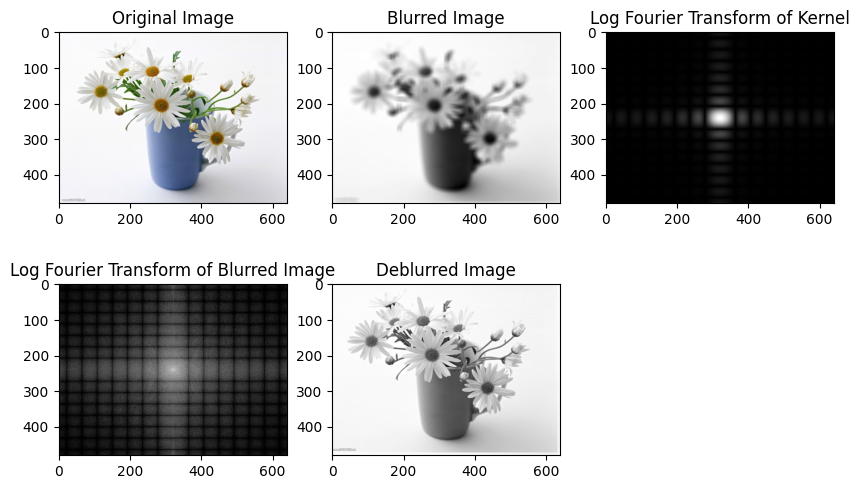

In [21]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 3, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(2, 3, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title("Blurred Image")

plt.subplot(2, 3, 3)
plt.imshow(np.log(np.abs(fft_kernel) + 1), cmap='gray')
plt.title("Log Fourier Transform of Kernel")

plt.subplot(2, 3, 4)
plt.imshow(np.log(np.abs(fft_blurred) + 1), cmap='gray')
plt.title("Log Fourier Transform of Blurred Image")

plt.subplot(2, 3, 5)
plt.imshow(deconvolved_image, cmap='gray')
plt.title("Deblurred Image")

plt.show()

##amazing right!!


we can also use fourier to remove noises

In [32]:
#load image
#apply noise
#remove noise using fft
from PIL import Image
import scipy.fftpack

image=Image.open('/content/flowers.png')
#convert to array
image_array=np.array(image)

In [33]:
#adding gaussian noise
mean=0
stddev=25
noise=np.random.normal(mean,stddev,image_array.shape).astype(np.uint8)
noisy_image=np.clip(image_array+noise,0,255).astype(np.uint8)

In [34]:
#convert to grayscale for less calc
gray_image=image_array[:,:,0]

In [35]:
##fft of image
fft_image=np.fft.fft2(gray_image)
#shift the fourier to centre the freq
#noises shifted to edge of the matrix and easier removal therfore
fft_image=np.fft.fftshift(fft_image)

In [36]:
#mean and sd of ff coef
fft_mean=np.mean(np.abs(fft_image))
fft_std=np.std(np.abs(fft_image))

In [45]:
#set the threshold to remove outliers
#we are removing all noises that are mean + 100 stand deviation
threshold=fft_mean+100*fft_std
filtered_fft_image=fft_image*(np.abs(fft_image)<threshold)

In [40]:
denoised_image = np.fft.ifft2(scipy.fftpack.ifftshift(filtered_fft_image))
#convert denoised back to uint8 range
denoised_image=np.uint8(np.abs(denoised_image))

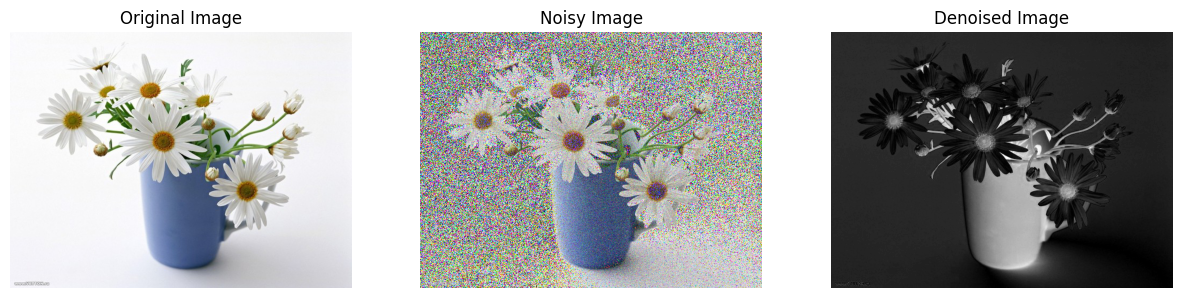

In [41]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(denoised_image, cmap='gray')
plt.title('Denoised Image')
plt.axis('off')

plt.show()

#edge detection laplacian

In [42]:
image = cv2.imread('/content/flowers.png', cv2.IMREAD_GRAYSCALE)

laplacian = cv2.Laplacian(image, cv2.CV_64F)

laplacian_abs = cv2.convertScaleAbs(laplacian)

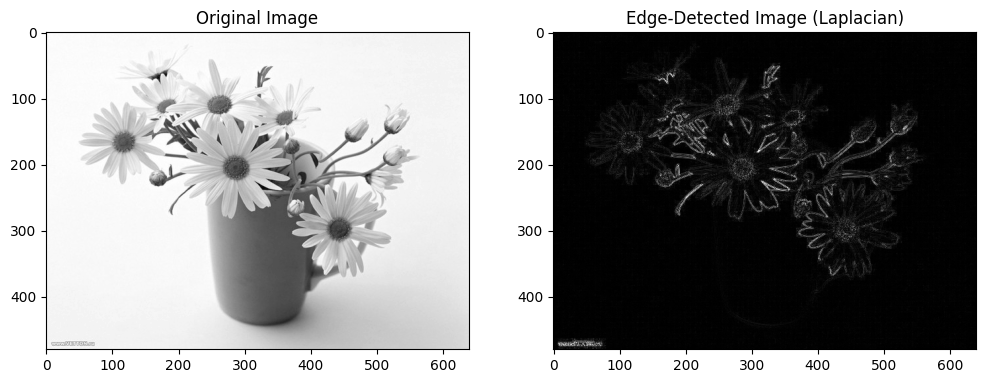

In [44]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(laplacian_abs, cmap='gray')
plt.title("Edge-Detected Image (Laplacian)")

plt.show()

lets add noise and blur and then deblur the image

In [46]:
def add_noise(image,mean,stddev):
  noise=np.random.normal(mean,stddev,image.shape)
  noisy_image=image+noise
  return noisy_image

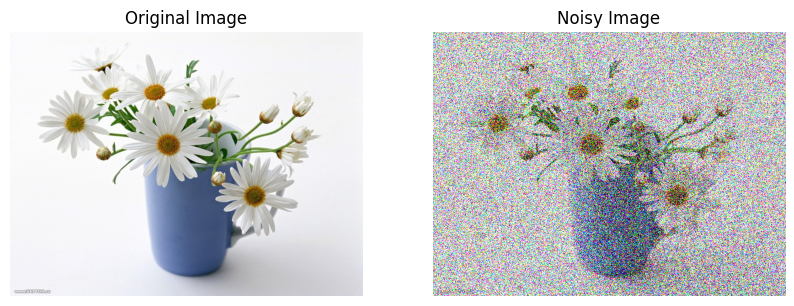

In [51]:
image=plt.imread('/content/flowers.png')
noisy_image=add_noise(image,0,0.6)
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.axis('off')

plt.show()


In [53]:
#convert to grayscale
gray_image2=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

In [54]:
blurred_image2=convolve2d(gray_image2,kernel,mode='same',boundary='wrap')

In [55]:
fft_kernel=np.fft.fftshift(np.fft.fft2(kernel,s=gray_image.shape))
fft_blurred2=np.fft.fftshift(np.fft.fft2(blurred_image2))

In [58]:
#wiener filter works best
signal_to_noise=0.0
deconvolved_image2=np.real(np.fft.ifft2(np.fft.ifftshift(fft_blurred2/(fft_kernel+signal_to_noise))))

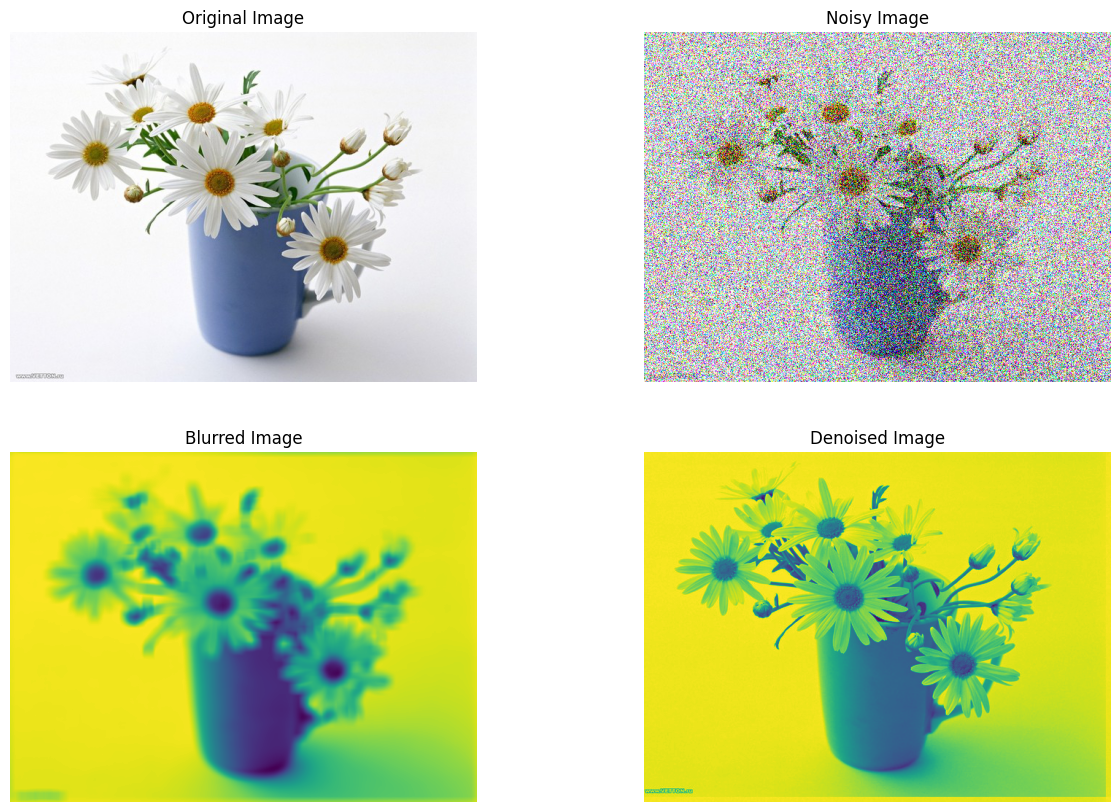

In [59]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(noisy_image)
plt.title('Noisy Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(blurred_image2)
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(deconvolved_image2)
plt.title('Denoised Image')
plt.axis('off')

plt.show()